<a href="https://colab.research.google.com/github/allahbakashiiitb/pytorch/blob/master/PytorchPrac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import torch

In [6]:
v = torch.tensor(3)
v

tensor(3)

In [7]:
v2 = torch.tensor([1,2,3])
v2

tensor([1, 2, 3])

In [8]:
v.dtype

torch.int64

In [9]:
v2[0]

tensor(1)

In [10]:
v2[:-1]

tensor([1, 2])

In [11]:
f = torch.FloatTensor([1,2,3,4,5])
f

tensor([1., 2., 3., 4., 5.])

In [13]:
torch.Size([5])

torch.Size([5])

In [14]:
v2.view(3,1)

tensor([[1],
        [2],
        [3]])

In [15]:
import numpy as np

In [16]:
a = np.array([1,2,3,4,5])
a

array([1, 2, 3, 4, 5])

In [17]:
tensor_cnv = torch.from_numpy(a)
tensor_cnv

tensor([1, 2, 3, 4, 5])

In [18]:
tensor_cnv.numpy()

array([1, 2, 3, 4, 5])

In [19]:
t1 = torch.tensor([1,2,3])
t2 = torch.tensor([1,2,3])

In [20]:
t1 + 3

tensor([4, 5, 6])

In [21]:
t1 + t2

tensor([2, 4, 6])

In [22]:
torch.dot(t1,t2)

tensor(14)

In [23]:
torch.linspace(0,10,5)

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])

In [24]:
import matplotlib.pyplot as plt

In [25]:
x = torch.linspace(0,10,5)
y = torch.exp(x)

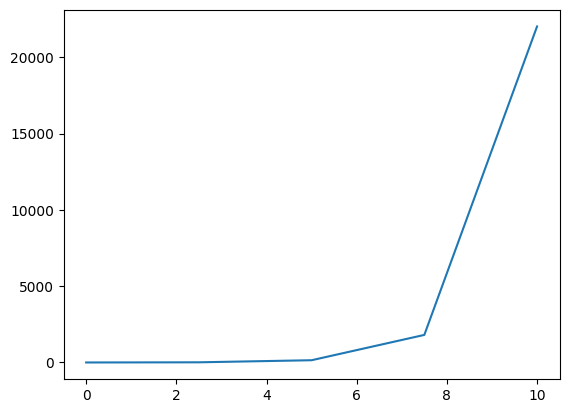

In [26]:
plt.plot(x, y)

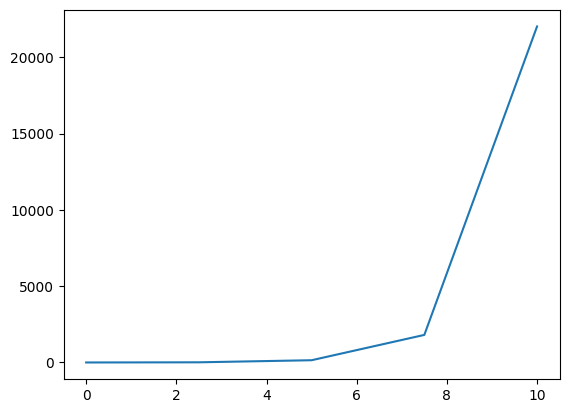

In [27]:
plt.plot(x.numpy(), y.numpy())

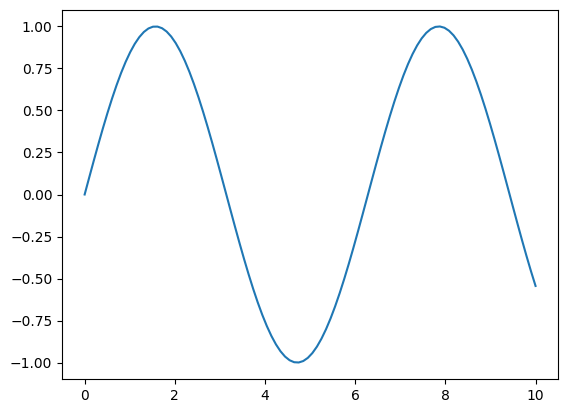

In [29]:
x = torch.linspace(0,10,100)
y = torch.sin(x)
plt.plot(x, y)

In [32]:
one_d = torch.arange(0, 9)
one_d

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [33]:
two_d = one_d.view(3,3)
two_d

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [34]:
two_d.dim()

2

In [35]:
two_d[1,2]

tensor(5)

In [36]:
x = torch.arange(18).view(2,3,3)
x

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])

In [37]:
x = torch.arange(18).view(3,3,2)
x

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [38]:
x[2,2,1]

tensor(17)

In [40]:
x[1,1,1]

tensor(9)

In [41]:
mat_a = torch.tensor([0,3,5,5,5,2]).view(2,3)
mat_a

tensor([[0, 3, 5],
        [5, 5, 2]])

In [42]:
mat_b = torch.tensor([3,4,3,-2,4,-2]).view(3,2)
mat_b

tensor([[ 3,  4],
        [ 3, -2],
        [ 4, -2]])

In [43]:
torch.matmul(mat_a, mat_b)

tensor([[ 29, -16],
        [ 38,   6]])

In [44]:
mat_a @ mat_b

tensor([[ 29, -16],
        [ 38,   6]])

In [45]:
x = torch.tensor(2.0, requires_grad=True)
y = 9*x**4 + 2*x**3 + 3*x**2 + 6*x + 1
y.backward()
x.grad

tensor(330.)

# Linear_Regression

In [46]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [47]:
def forward(x):
  y = w*x + b
  return y

In [48]:
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [49]:
from torch.nn import Linear

In [50]:
torch.manual_seed(1)

model = Linear(in_features=1, out_features=1)

print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [51]:
x = torch.tensor([2.0])

print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [52]:
x = torch.tensor([[2.0],[3.3]])

print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)


## Custom modules

In [55]:
import torch.nn as nn

class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

In [56]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [57]:
import torch.nn as nn

class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [59]:
torch.manual_seed(1)
model = LR(1, 1)

x = torch.tensor([1.0])
print(model.forward(x))

tensor([0.0739], grad_fn=<AddBackward0>)


In [60]:
torch.manual_seed(1)
model = LR(1, 1)

x = torch.tensor([[1.0],[2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


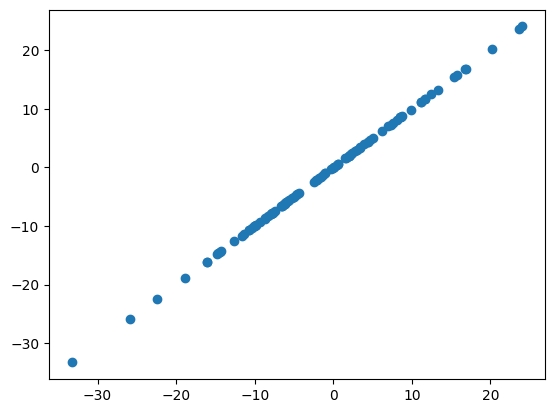

In [77]:
X = torch.randn(100, 1) * 10
y = X

plt.plot(X.numpy(), y.numpy(), 'o')

Text(0, 0.5, 'y')

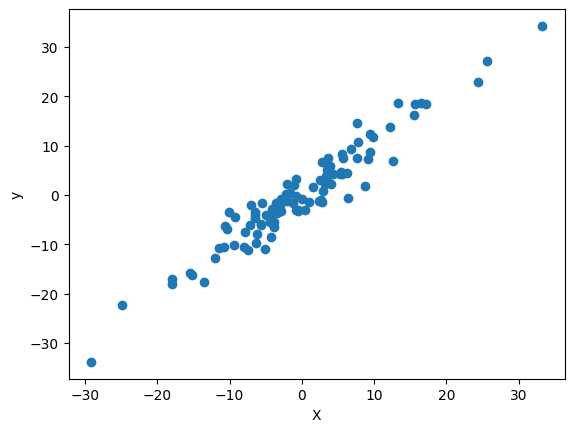

In [78]:
X = torch.randn(100, 1) * 10
y = X + 3*torch.randn(100,1)

plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('y')

In [79]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred


In [80]:
torch.manual_seed(1)
model = LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [81]:
[w, b] = model.parameters()
print(w, b)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [82]:
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

0.5152631998062134 -0.44137823581695557


In [83]:
def get_params():
  return (w[0][0].item(), b[0].item())

In [84]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

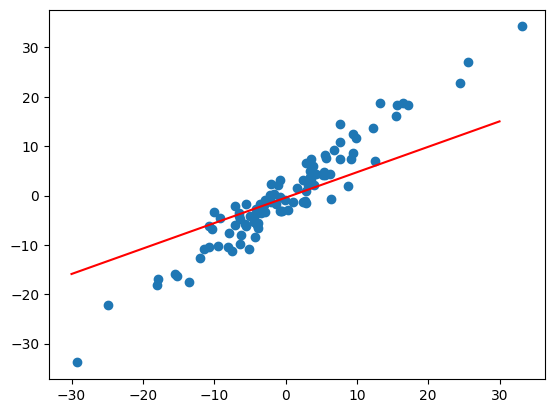

In [85]:
plot_fit("Initial Model")

In [86]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)


In [99]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print('epoch:', i, "loss:" , loss.item())

  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 7.821622848510742
epoch: 1 loss: 7.821334362030029
epoch: 2 loss: 7.821056365966797
epoch: 3 loss: 7.820791244506836
epoch: 4 loss: 7.820535182952881
epoch: 5 loss: 7.820289134979248
epoch: 6 loss: 7.8200531005859375
epoch: 7 loss: 7.819826602935791
epoch: 8 loss: 7.81960916519165
epoch: 9 loss: 7.819399356842041
epoch: 10 loss: 7.819199085235596
epoch: 11 loss: 7.81900691986084
epoch: 12 loss: 7.818820953369141
epoch: 13 loss: 7.818642616271973
epoch: 14 loss: 7.818472385406494
epoch: 15 loss: 7.818307876586914
epoch: 16 loss: 7.818150520324707
epoch: 17 loss: 7.817999839782715
epoch: 18 loss: 7.817853927612305
epoch: 19 loss: 7.817714691162109
epoch: 20 loss: 7.8175811767578125
epoch: 21 loss: 7.8174519538879395
epoch: 22 loss: 7.817327976226807
epoch: 23 loss: 7.817209243774414
epoch: 24 loss: 7.8170952796936035
epoch: 25 loss: 7.816986083984375
epoch: 26 loss: 7.81688117980957
epoch: 27 loss: 7.816779613494873
epoch: 28 loss: 7.8166823387146
epoch: 29 loss: 7.8165893

Text(0.5, 0, 'epochs')

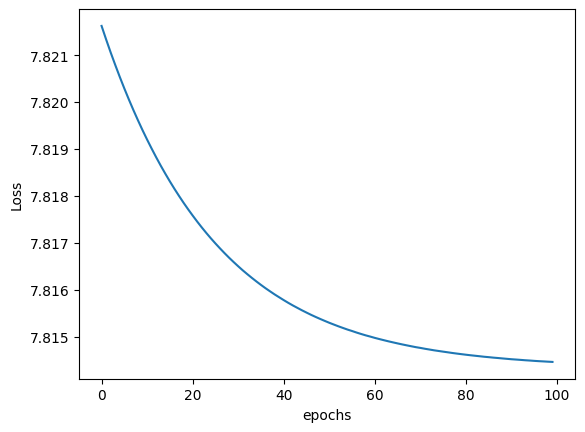

In [119]:
plt.plot(range(epochs), [i.item() for i in losses])
plt.ylabel("Loss")
plt.xlabel("epochs")

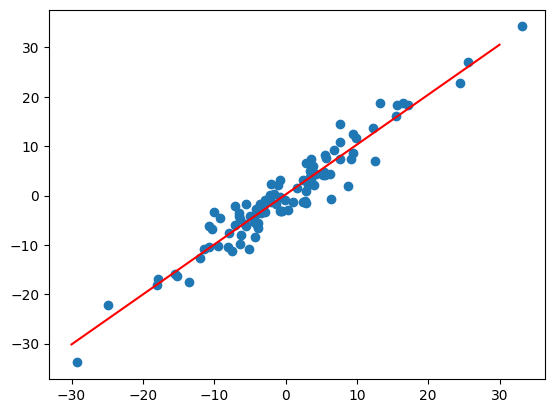

In [120]:
plot_fit("Trained Model")